Week 4 RF simulations:
- we’re looking for simulations that will show us a difference between the splitters (MAE, MSE, FriedmanMSE)
- MAE should be more robust when the data contains outliers. let’s use a gross error model to simulate our data. (the model has two distributions — one is true and one is gross. samples come from the gross distribution with prob epsilon. note that you sample (X, y) from both distributions). show MSE versus epsilon (epsilon \in [0, 0.5]). make sure to test on data from the true distribution!
- approaches for gross model: 1) sample (X, y) jointly or 2) sample X, transform to obtain y, add noise

# Experiment: Demonstrating an instance of MAE superiority

Vivek Gopalakrishnan | Nov 6, 2019


## Goal

Design a simulation where Mean Absolute Error (MAE) outperforms Mean Squared Error (MSE). 

In high-dimensional multivariate random forest regresion, the choise of split criteria is critical. However, in all our simulations so far, we have not been able to find a situtaion where one of our proposed splitters dominates the others. In fact, we've not been able to seperate the splitters at all. Thus, we are taking a different approach: instead of sampling arbitrary data distributions, why not specifically design distributions which we know to favor a given splitter?


## Simulation

We will design a simulation in which MAE should theoretically outperform MSE. To do so, we will use a gross error model.


### Gross Error Model

Let $F_{X, y}$ and $G_{X, y}$ be two joint distributions defined over the same space.

We will sample our distribution like this:
$$
X_i, y_i \sim 
\begin{cases} 
      F_{X, y} & \text{with probability } \epsilon \\
      G_{X, y} & \text{with probability } 1-\epsilon \\
\end{cases} \,,
$$

where $\epsilon \in [0, 0.5]$.

We say $F_{X, y}$ is the outlier distribution and $G_{X, y}$ is the true distribution. Together this model is known as the Gross Error Model.


### Intuition

Theoretically, MAE should outperform MSE in this setting because the median is more robust to outliers compared to the mean.


### Setup

Jointly sample 50 samples from the gross error model. Train forests with both splitters on the data. Measure testing accuracy on a heldout set of 1,000 samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

from gross_model import GrossErrorModel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
gem = GrossErrorModel(n_features=2, n_targets=1)
gem.cov_1, gem.cov_2

(array([[1.        , 0.        , 0.12928812],
        [0.        , 1.        , 0.10631353],
        [0.12928812, 0.10631353, 1.        ]]),
 array([[1.        , 0.        , 0.98194293],
        [0.        , 1.        , 0.14099933],
        [0.98194293, 0.14099933, 1.        ]]))

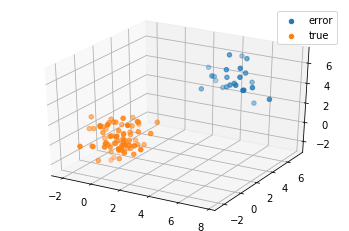

In [4]:
# Sample the data
X, y, model_label = gem.sample(n_samples=100, epsilon=0.2)

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[model_label == 0, 0], X[model_label == 0, 1], y.reshape(-1)[model_label == 0], label="error")
ax.scatter(X[model_label == 1, 0], X[model_label == 1, 1], y.reshape(-1)[model_label == 1], label="true")
plt.legend()
plt.show()